In [8]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [9]:
# import the database of extracted data - by trial.
import h5py
epoch_db = h5py.File('../imaging_post_processing/epoch_db_nnls_fits_bk_sub_F.hdf5','a')

In [10]:
def kill_spines(top = True,bottom =True, left = True,right=True):
    if top:
        plb.gca().spines['top'].set_visible(False)
        #[x.set_visible(False) for x in plb.gca().get_xticklabels()]
        [x.set_visible(False) for x in plb.gca().get_xticklines()[1::2]]
    if right:
        plb.gca().spines['right'].set_visible(False)
        #[y.set_visible(False) for y in plb.gca().get_yticklabels()]
        [y.set_visible(False) for y in plb.gca().get_yticklines()[1::2]]
    if left:
        plb.gca().spines['left'].set_visible(False)
        [y.set_visible(False) for y in plb.gca().get_yticklabels()]
        [y.set_visible(False) for y in plb.gca().get_yticklines()[::2]]
    if bottom:
        plb.gca().spines['bottom'].set_visible(False)
        [x.set_visible(False) for x in plb.gca().get_xticklabels()]
        [x.set_visible(False) for x in plb.gca().get_xticklines()[::2]]

In [11]:
# load the epoch_db data into memory as a dict of array's
data = dict()
data['exp_names'] = np.array(epoch_db['exp_names'])
data['fly_numbers'] = np.array(epoch_db['fly_numbers'])
data['genotypes'] = np.array(epoch_db['genotypes'])
data['signal_data'] = np.array(epoch_db['signal_data'])
data['signal_names'] = np.array(epoch_db['signal_names'])
data['trial_names'] = np.array(epoch_db['trial_names'])

In [12]:
set(data['trial_names'])

{'ascending',
 'descending',
 'flight_starts',
 'flight_stops',
 'progressive',
 'pth_roll_0',
 'pth_roll_120',
 'pth_roll_150',
 'pth_roll_180',
 'pth_roll_210',
 'pth_roll_240',
 'pth_roll_270',
 'pth_roll_30',
 'pth_roll_300',
 'pth_roll_330',
 'pth_roll_60',
 'pth_roll_90',
 'pth_roll_multipole',
 'pth_roll_phsrndm',
 'regressive',
 'stripe_fix',
 'yaw_left',
 'yaw_right'}

In [80]:
# selection idx's 
freq_idx = data['signal_names'] == 'wb_frequency'
lw_idx = data['signal_names'] == 'Ph0'
rw_idx = data['signal_names'] == 'Ph1'

# trial type selection idxs
remap_idxs = dict()

remap_idxs['150'] = data['trial_names'] == 'pth_roll_300'
remap_idxs['120'] = data['trial_names'] == 'pth_roll_330'
remap_idxs['90'] = data['trial_names'] == 'pth_roll_0'
remap_idxs['60'] = data['trial_names'] == 'pth_roll_30'
remap_idxs['30'] = data['trial_names'] == 'pth_roll_60'
remap_idxs['0'] = data['trial_names']  == 'pth_roll_90'
remap_idxs['-30'] = data['trial_names'] == 'pth_roll_120'
remap_idxs['-60'] = data['trial_names'] == 'pth_roll_150'
remap_idxs['-90'] = data['trial_names'] == 'pth_roll_180'
remap_idxs['-120'] = data['trial_names'] == 'pth_roll_210'
remap_idxs['-150'] = data['trial_names'] == 'pth_roll_240'
remap_idxs['-180'] = data['trial_names'] == 'pth_roll_270'
pth_up_idx = data['trial_names'] == 'pth_roll_0'

In [17]:
freq_baselines = np.mean(data['signal_data'][pth_up_idx & freq_idx][:,100:200],axis = 1)
lw_baselines =  np.mean(data['signal_data'][pth_up_idx & lw_idx][:,100:200],axis = 1)
rw_baselines =  np.mean(data['signal_data'][pth_up_idx & rw_idx][:,100:200],axis = 1)
#pow_baselines = amp_baselines*freq_baselines**2

In [18]:
sort_idx_freq = argsort(freq_baselines)
sort_idx_rw = argsort(rw_baselines)
#sort_idx_pow = argsort(pow_baselines)

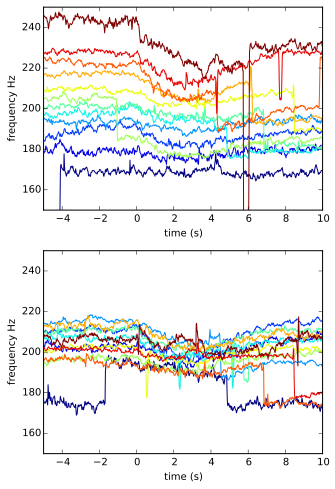

In [21]:
figure(figsize = (5,8))
subplot(2,1,1)
xi = np.linspace(0,23,1150)-7
for i,bins in enumerate(range(10,len(sort_idx_freq),20)):
    color = i/11.0
    plot(xi,np.mean(data['signal_data'][pth_up_idx & freq_idx][sort_idx_freq[bins:bins+10]],axis = 0),color = cm.jet(color))

gca().set_ybound(150,250)
gca().set_xbound(-5,10)
gca().set_xlabel('time (s)')
gca().set_ylabel('frequency Hz')

subplot(2,1,2)
for i,bins in enumerate(range(10,len(sort_idx_rw),20)):
    color = i/11.0
    plot(xi,np.mean(data['signal_data'][pth_up_idx & freq_idx][sort_idx_rw[bins:bins+10]],axis = 0),color = cm.jet(color))
gca().set_ybound(150,250)
gca().set_xbound(-5,10)
gca().set_xlabel('time (s)')
gca().set_ylabel('frequency Hz')
savefig('fig_s1.pdf')

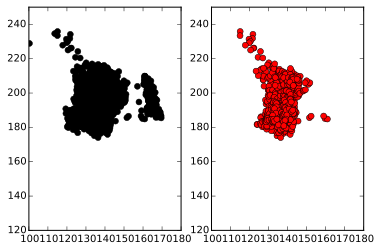

In [146]:
xi = np.linspace(0,23,1150)-7
import group_data as gd
fnum = gd.GMR22H05_pr_list[3]
fly_idx = data['fly_numbers'] == fnum

#selection_r = remap_idxs['0'] & rw_idx & fly_idx
#selection_l = remap_idxs['0'] & lw_idx & fly_idx
#selection_f = remap_idxs['0'] & freq_idx & fly_idx
#xi = np.linspace(0,23,1150)-7

#lr_deg = rad2deg((data['signal_data'][selection_r] + data['signal_data'][selection_l])/(2*5))+90
#plot(lr_deg,
#     data['signal_data'][selection_f],'o',color = 'k',alpha = 0.1)

selection_r = remap_idxs['90'] & rw_idx & fly_idx
selection_l = remap_idxs['90'] & lw_idx & fly_idx
selection_f = remap_idxs['90'] & freq_idx & fly_idx
lr_deg = rad2deg((data['signal_data'][selection_r]+ data['signal_data'][selection_l])/(2*5))+90

subplot(1,2,1)
lns = plot(lr_deg[:,:] ,
     data['signal_data'][selection_f][:,:] ,'o',color = 'k',alpha = 0.05)


subplot(1,2,2,sharex = gca(),sharey = gca())
lns= plot(lr_deg[:,(xi>0) & (xi<3)] ,
     data['signal_data'][selection_f][:,(xi>0) & (xi<3)] ,'o',color = 'r',alpha = 0.2)

plb.gca().set_ybound(120,250)
plb.gca().set_xbound(100,180)

In [ ]:
fig = figure(figsize = (10,8))
from matplotlib import gridspec
gs = gridspec.GridSpec(5,12)

tidx = (xi < 7.0) & (xi > -1.0)
def tnsfb(sig):
    return rad2deg(sig/5.0)

for i,int_key in enumerate(range(-180,180,30)):
    idx = remap_idxs['%s'%int_key]
    lw = data['signal_data'][idx & lw_idx]
    rw = data['signal_data'][idx & rw_idx]
    imc = rw-lw
    ipc = lw+rw
    freq = data['signal_data'][idx & freq_idx]
    
    ###freq###
    fig.add_subplot(gs[0,i])
    md = np.nanmedian(freq,axis = 0)[tidx]
    ub = np.percentile(freq,75,axis = 0)[tidx]
    lb = np.percentile(freq,25,axis = 0)[tidx]
    fill_between(xi[tidx],ub,lb,color = 'k',lw = 0,alpha = 0.2,clip_on = False)
    plot(xi[tidx],md,clip_on = False,color = 'k')
    gca().set_ybound(190,220)
    gca().set_xbound(-1,7)
    if i < 1:
        gca().spines['left'].set_position(('outward', 10))
        kill_spines(left = False);
        gca().set_ylabel('frequency')
    else:
        kill_spines();
    
    fig.add_subplot(gs[1,i])
    md = np.nanmedian(tnsfb(rw),axis = 0)[tidx]
    ub = np.percentile(tnsfb(rw),75,axis = 0)[tidx]
    lb = np.percentile(tnsfb(rw),25,axis = 0)[tidx]
    fill_between(xi[tidx],ub,lb,color = 'k',lw = 0,alpha = 0.2,clip_on = False)
    plot(xi[tidx],md,clip_on = False,color = 'k')
    gca().set_ybound(30,60)
    gca().set_xbound(-1,7)
    if i < 1:
        gca().spines['left'].set_position(('outward', 10))
        kill_spines(left = False);
        gca().set_ylabel('ipsi (deg)')
    else:
        kill_spines();
    
    fig.add_subplot(gs[2,i])
    md = np.nanmedian(tnsfb(lw),axis = 0)[tidx]
    ub = np.percentile(tnsfb(lw),75,axis = 0)[tidx]
    lb = np.percentile(tnsfb(lw),25,axis = 0)[tidx]
    fill_between(xi[tidx],ub,lb,color = 'k',lw = 0,alpha = 0.2,clip_on = False)
    plot(xi[tidx],md,clip_on = False,color = 'k')
    gca().set_ybound(30,60)
    gca().set_xbound(-1,7)
    if i < 1:
        gca().spines['left'].set_position(('outward', 10))
        kill_spines(left = False);
        gca().set_ylabel('contra (deg)')
    else:
        kill_spines();
    
    fig.add_subplot(gs[3,i])
    md = np.nanmedian(tnsfb(imc),axis = 0)[tidx]
    ub = np.percentile(tnsfb(imc),75,axis = 0)[tidx]
    lb = np.percentile(tnsfb(imc),25,axis = 0)[tidx]
    fill_between(xi[tidx],ub,lb,color = 'k',lw = 0,alpha = 0.2,clip_on = False)
    plot(xi[tidx],md,clip_on = False,color = 'k')
    gca().set_ybound(-20,20)
    gca().set_xbound(-1,7)
    if i < 1:
        gca().spines['left'].set_position(('outward', 10))
        kill_spines(left = False); 
        gca().set_ylabel('i-c (deg)')
    else:
        kill_spines();
    
    fig.add_subplot(gs[4,i])
    md = np.nanmedian(tnsfb(ipc),axis = 0)[tidx]
    ub = np.percentile(tnsfb(ipc),75,axis = 0)[tidx]
    lb = np.percentile(tnsfb(ipc),25,axis = 0)[tidx]
    fill_between(xi[tidx],ub,lb,color = 'k',lw = 0,alpha = 0.2,clip_on = False)
    plot(xi[tidx],md,clip_on = False,color = 'k')
    gca().set_ybound(70,100)
    gca().set_xbound(-1,7)
    if i < 1:
        gca().spines['left'].set_position(('outward', 10))
        kill_spines(left = False); 
        gca().set_ylabel('i+c (deg)')
    else:
        kill_spines();
        
    ax = fig.add_subplot(gs[:,i])
    ax.patch.set_alpha(0.0)
    axvspan(0,3,alpha = 0.1,lw = 0)
    gca().set_xbound(-1,7)
    kill_spines()
    
savefig('fig_s1.pdf')